# Market Basket Analysis

In [4]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default asthetic parameters.
sns.set()

### The dataset
#### We'll use a dataset from a Brazilian ecommerce site (olist.com) that is divided into three CSV files:
- olist_order_items_dataset.csv
- olist_products_dataset.csv
- product_category_name_translation.csv

In [5]:
# Load orders dataset.
orders = pd.read_csv('Data/olist_order_items_dataset.csv')

# Load products items dataset.
products = pd.read_csv('Data/olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv('Data/product_category_name_translation.csv')

In [6]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9


In [7]:
# Print orders info.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [8]:
# Print products header.
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [9]:
# Print translations header.
translations.head(20)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfume
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [10]:
# Print translations info.
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


# Translating item category names
### The product names are given in Portuguese.

- We'll translate the names to English using a pandas DataFrame named translations.
- .merge() performs a join operation on columns or indices.
   on is the column on which to perform the join.
- how specifies which keys to use to perform the join

In [11]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")

# Print English names.
products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

In [12]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0,perfume
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0,housewares


# Convert product IDs to product category names.


In [13]:
# Define product category name in orders DataFrame.
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

In [14]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [15]:
# Drop products without a defined category.
orders.dropna(inplace=True, subset=['product_category_name_english'])
orders.head(50)

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.00,sports_leisure
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.00,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
5,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor
6,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfume
7,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,garden_tools
8,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,21.90,housewares
9,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,telephony
10,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,810.00,garden_tools


In [16]:
# Print number of unique items.
len(orders['product_id'].unique())

32328

In [17]:
# Print number of unique categories.
len(orders['product_category_name_english'].unique())

71

# Construct transactions from order and product data

In [19]:
# Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'b8bfa12431142333a0c84802f9529d87']['product_category_name_english']

# Print example.
example1

0    sports_leisure
2    sports_leisure
Name: product_category_name_english, dtype: object

In [20]:
# Identify transactions associated with example order.
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

# Print example.
example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object

In [21]:
# Recover transaction itemsets from orders DataFrame.
transactions = orders.groupby("order_id").product_category_name_english.unique()

# Print transactions header.
transactions.head(20)

order_id
00010242fe8c5a6d1ba2dd792cb16214                  [cool_stuff]
00018f77f2f0320c557190d7a144bdd3                    [pet_shop]
000229ec398224ef6ca0657da4fc703e             [furniture_decor]
00024acbcdf0a6daa1e931b038114c75                     [perfume]
00042b26cf59d7ce69dfabb4e55b4fd9                [garden_tools]
00048cc3ae777c65dbb7d2a0634bc1ea                  [housewares]
00054e8431b9d7675808bcb819fb4a32                   [telephony]
000576fe39319847cbb9d288c5617fa6                [garden_tools]
0005a1a1728c9d785b8e2b08b904576c               [health_beauty]
0005f50442cb953dcd1d21e1fb923495             [books_technical]
00061f2a7bc09da83e415a52dc8a4af1               [health_beauty]
00063b381e2406b52ad429470734ebd5    [fashion_bags_accessories]
0006ec9db01a64e59a68b2c340bf65a7              [bed_bath_table]
0008288aa423d2a3f00fcb17cd7d8719                [garden_tools]
0009792311464db532ff765bf7b182ae              [sports_leisure]
0009c9a17f916a706d71784483a5d643              

<Axes: >

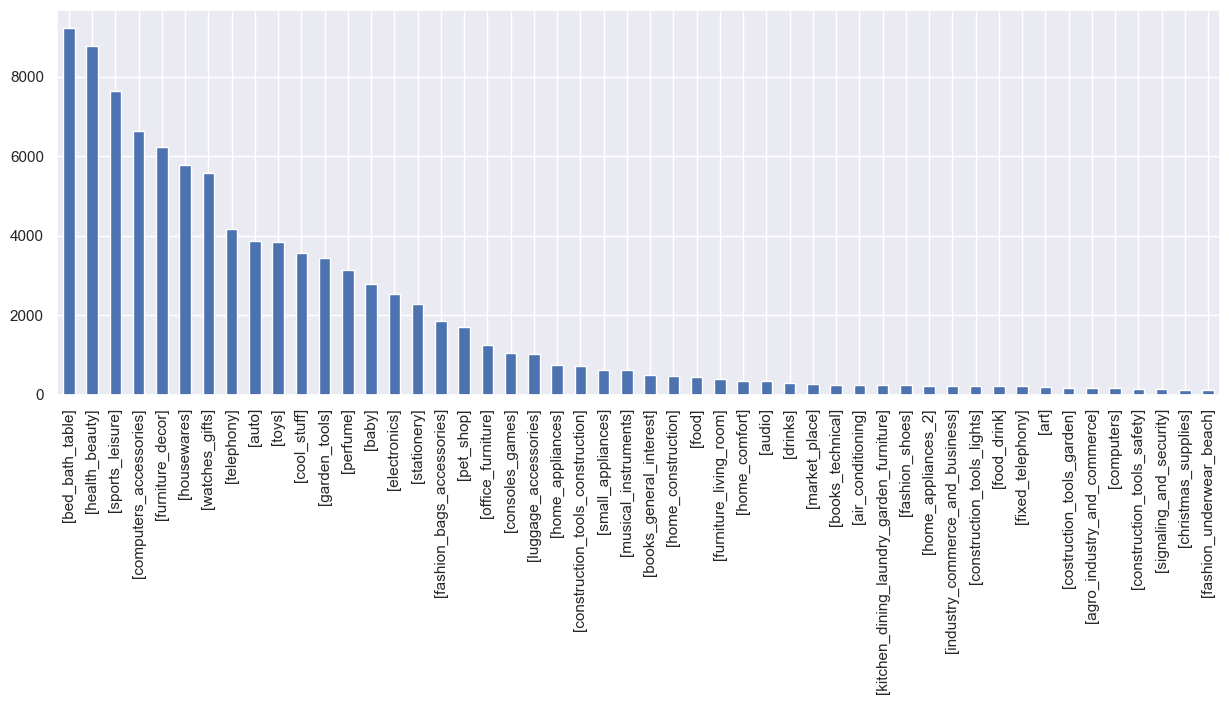

In [22]:
# Plot 50 largest categories of transactions.
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [23]:
# Convert the pandas series to list of lists.
transactions = transactions.tolist()

In [24]:
# Print length of transactions.
len(transactions)

97256

In [25]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]
print(counts)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [26]:
# Print median number of items in a transaction.
np.median(counts)

1.0

In [27]:
# Print maximum number of items in a transaction.
np.max(counts)

3

# Association Rules and Metrics

### Association rule: an "if-then" relationship between two itemsets.

- rule: if {coffee) then {milk}.
- antecedent: coffee
- consequent: milk

### Metric: a measure of the strength of association between two itemsets.

- rule: if {coffee) then {milk}
- support: 0.10
- leverage: 0.03



### One-hot encode the transaction data

In [28]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 657.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 714.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.4 MB 1.0 MB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.4 MB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.4 MB 2.

In [29]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [30]:
onehot['sports_leisure']

0        False
1        False
2        False
3        False
4        False
         ...  
97251    False
97252    False
97253     True
97254    False
97255    False
Name: sports_leisure, Length: 97256, dtype: bool

In [31]:
onehot

,agro_industry_and_commerce,air_conditioning,art,arts_and_crafts,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97252,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97253,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
97254,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_crafts,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Compute the support metric
- Applying one-hot encoding will transform the list of lists (of transactions) into a DataFrame
![image-2.png](attachment:image-2.png)

In [33]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_crafts               0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64

In [34]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

1    96530
2      711
3       15
dtype: int64

# Create a column for an itemset with multiple items

In [35]:
# # Add sports_leisure and health_beauty to DataFrame.
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

# Print support value.
onehot['sports_leisure_health_beauty'].mean(axis = 0)

0.00014394998766142962

In [36]:
# Add agro_industry_and_commerce and arts_and_crafts to DataFrame.
onehot['agro_industry_and_commerce_arts_and_crafts'] = onehot['agro_industry_and_commerce'] & onehot['arts_and_crafts']

# # Print support value.
onehot['agro_industry_and_commerce_arts_and_crafts'].mean(axis = 0)

0.0

# Aggregate the dataset further by combining product sub-categories

In [37]:

# Merge books_imported and books_technical.
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

# Print support values for books, books_imported, and books_technical.
onehot[['books','books_imported','books_technical']].mean(axis=0)

books              0.003218
books_imported     0.000545
books_technical    0.002673
dtype: float64

# Compute the confidence metric

![image.png](attachment:image.png)

In [38]:
# Compute joint support for agro_industry_and_commerce and arts_and_crafts.
joint_support = (onehot['agro_industry_and_commerce'] & onehot['arts_and_crafts']).mean()

# Print confidence metric for agro_industry_and_commerce -> arts_and_crafts.
joint_support / onehot['agro_industry_and_commerce'].mean()

0.0

In [39]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

# Print confidence metric for sports_leisure -> health_beauty.
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

In [40]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['health_beauty'] & onehot['sports_leisure']).mean()

# Print confidence metric for health_beauty -> sports_leisure.
joint_support / onehot['health_beauty'].mean()

0.0015844273426889996

# Applying the Apriori algorithm
- The Apriori algorithm identifies frequent (high support) itemsets using something called the Apriori principle, which states that a superset that contains an infrequent item is also infrequent
- Pruning is the process of removing itemsets or association rules, typically based on the application of a metric threshold.
![image.png](attachment:image.png)

In [41]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.040070,(5)
1,0.029664,(6)
2,0.096827,(7)
3,0.068777,(15)
4,0.010920,(16)
5,0.037345,(20)
6,0.026219,(27)
7,0.019166,(28)
8,0.066310,(40)
9,0.036173,(43)


In [42]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.003599,(audio)
4,0.040070,(auto)
5,0.029664,(baby)
6,0.096827,(bed_bath_table)
7,0.005264,(books_general_interest)
8,0.002673,(books_technical)
9,0.001316,(christmas_supplies)


In [43]:
# Apply apriori algorithm to data with min support threshold of 0.00005.
frequent_itemsets = apriori(onehot, min_support = 0.00005, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.000236,(arts_and_crafts)
4,0.003599,(audio)
...,...,...
108,0.000051,"(luggage_accessories, stationery)"
109,0.000051,"(watches_gifts, sports_leisure)"
110,0.000144,"(sports_leisure_health_beauty, sports_leisure)"
111,0.000062,"(toys, stationery)"


In [44]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.000236,(arts_and_crafts)
4,0.003599,(audio)
...,...,...
107,0.000113,"(housewares, sports_leisure)"
108,0.000051,"(luggage_accessories, stationery)"
109,0.000051,"(watches_gifts, sports_leisure)"
110,0.000144,"(sports_leisure_health_beauty, sports_leisure)"


# Computing association rules from Apriori output

In [45]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bed_bath_table),(baby),0.096827,0.029664,0.000175,0.001805,0.060856,1.0,-0.002697,0.972091,-0.944710,0.001384,-0.028710,0.003849
1,(baby),(bed_bath_table),0.029664,0.096827,0.000175,0.005893,0.060856,1.0,-0.002697,0.908527,-0.940842,0.001384,-0.100683,0.003849
2,(baby),(cool_stuff),0.029664,0.037345,0.000206,0.006932,0.185633,1.0,-0.000902,0.969375,-0.818876,0.003078,-0.031592,0.006220
3,(cool_stuff),(baby),0.037345,0.029664,0.000206,0.005507,0.185633,1.0,-0.000902,0.975709,-0.820052,0.003078,-0.024896,0.006220
4,(baby),(furniture_decor),0.029664,0.066310,0.000123,0.004159,0.062728,1.0,-0.001844,0.937590,-0.939020,0.001287,-0.066564,0.003010


# Pruning association rules

In [46]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,1.0,-0.000086,0.957388,-0.627199,0.000752,-0.044508,0.012764
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,1.0,-0.000146,0.958606,-0.704299,0.001005,-0.043181,0.009105
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,1.0,-0.005701,0.913084,-0.894549,0.004432,-0.095189,0.009144
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,1.0,0.000047,1.012881,0.106474,0.004401,0.012717,0.056439
4,(books),(books_imported),0.003218,0.000545,0.000545,0.169329,310.722045,1.0,0.000543,1.203190,1.000000,0.169329,0.168876,0.584665
5,(books_imported),(books),0.000545,0.003218,0.000545,1.000000,310.722045,1.0,0.000543,inf,0.997325,0.169329,1.000000,0.584665
6,(books),(books_technical),0.003218,0.002673,0.002673,0.830671,310.722045,1.0,0.002665,5.889872,1.000000,0.830671,0.830217,0.915335
7,(books_technical),(books),0.002673,0.003218,0.002673,1.000000,310.722045,1.0,0.002665,inf,0.999454,0.830671,1.000000,0.915335
8,(construction_tools_lights),(furniture_decor),0.002509,0.066310,0.000113,0.045082,0.679872,1.0,-0.000053,0.977770,-0.320675,0.001646,-0.022735,0.023394
9,(furniture_living_room),(furniture_decor),0.004339,0.066310,0.000072,0.016588,0.250155,1.0,-0.000216,0.949439,-0.750660,0.001020,-0.053253,0.008837


In [47]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,1.0,-0.005701,0.913084,-0.894549,0.004432,-0.095189,0.009144
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,1.0,0.000047,1.012881,0.106474,0.004401,0.012717,0.056439


### The leverage metric

In [48]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,1.0,0.000047,1.012881,0.106474,0.004401,0.012717,0.056439


## Visualizing patterns in metrics

<Axes: xlabel='leverage', ylabel='confidence'>

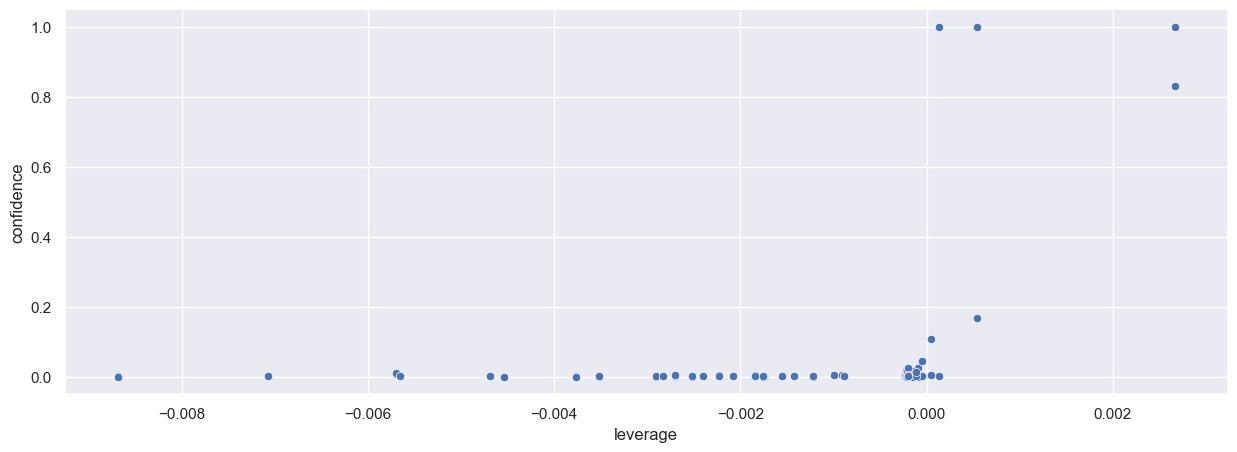

In [49]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

<Axes: xlabel='leverage', ylabel='lift'>

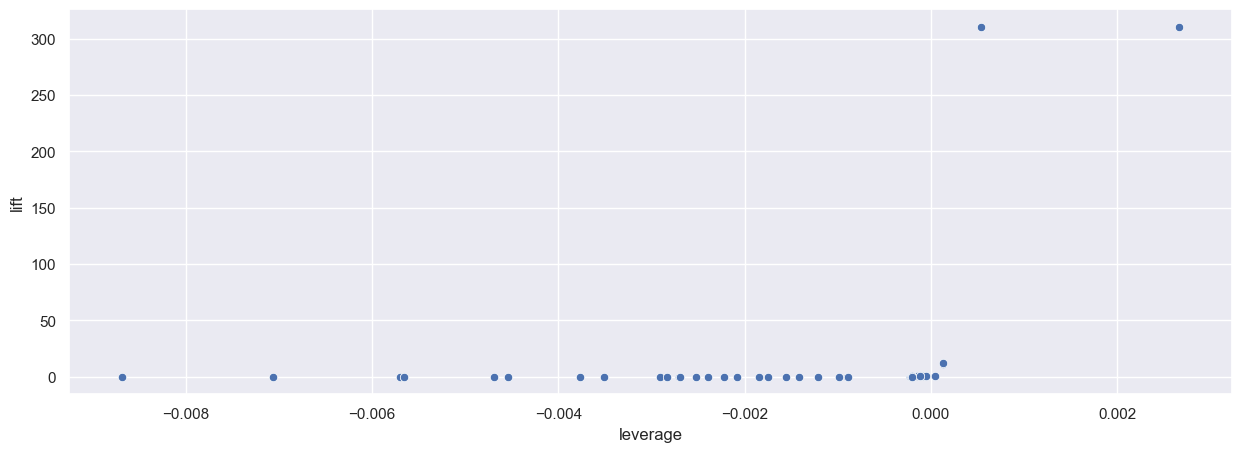

In [50]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="lift", data=rules)